In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-trig-interp)

We will get a cardinal function without using an explicit formula, just by passing data that is 1 at one node and 0 at the others.
```{tip}
:class: dropdown
The operator `÷`, typed as `\div` then <kbd>Tab</kbd>, returns the quotient without remainder of two integers.
```

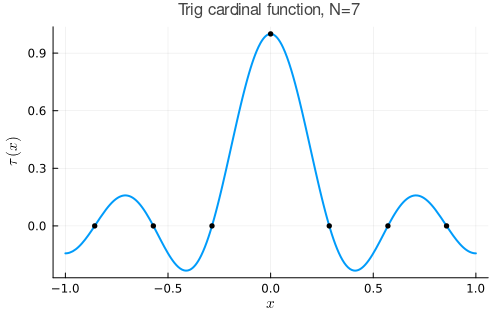

In [2]:
N = 7
n = (N - 1) ÷ 2
t = 2 * (-n:n) / N
y = zeros(N)
y[n+1] = 1

p = FNC.triginterp(t, y);
plot(p, -1, 1)

scatter!(t, y, color=:black, 
    xaxis=(L"x"),  yaxis=(L"\tau(x)"),
    title="Trig cardinal function, N=$N")

Here is a 2-periodic function and one of its interpolants.

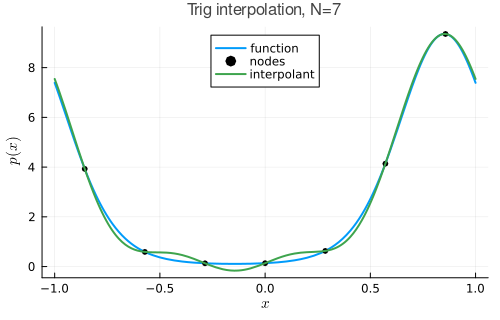

In [3]:
f(x) = exp( sinpi(x) - 2*cospi(x) )
y = f.(t)
p = FNC.triginterp(t, y)

plot(f, -1, 1, label="function",
    xaxis=(L"x"),  yaxis=(L"p(x)"),
    title="Trig interpolation, N=$N", legend=:top)
scatter!(t, y, m=:o, color=:black, label="nodes")
plot!(p, -1, 1, label="interpolant")

```{index} ! Julia; ÷
```

The convergence of the interpolant is spectral. We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes. Note that when $N$ is even, the value of $n$ is not an integer but works fine for defining the nodes.

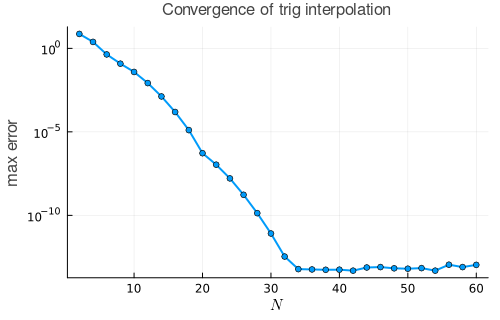

In [4]:
N = 2:2:60
err = zeros(size(N))
x = range(-1, 1, 2501)  # for measuring error
for (k,N) in enumerate(N)
    n = (N-1) / 2;   t = 2*(-n:n) / N;
    p = FNC.triginterp(t, f.(t))
    err[k] = norm(f.(x) - p.(x), Inf)
end

plot(N, err, m=:o,
    xaxis=(L"N"),  yaxis=(:log10, "max error"),
    title="Convergence of trig interpolation")